# Week 7

#### Import Library

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
dataset = pd.read_csv("winequality-red.csv", delimiter=";")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
print(dataset.groupby('quality').size())
dataset.info()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Split independent & dependent variable

In [57]:
redwine = dataset.copy()
Y = redwine['quality']                  # Independent Variable
X = redwine.drop(columns='quality')     # Dependent Variable

#### Split data train & data test

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Accuracy of Logistic Regression Classifier on training data set: {:.2f}".format(logreg.score(X_train, y_train)))
print("Accuracy of Logistic Regression Classifier on test data set: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training data set: 0.58
Accuracy of Logistic Regression Classifier on test data set: 0.62


c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Accuracy of Decision Tree Classifier on training data set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Decision Tree Classifier on test data set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training data set: 1.00
Accuracy of Decision Tree Classifier on test data set: 0.68


## K Nearest Neighbor

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Accuracy of K-NN Classifier on training data set: {:.2f}".format(knn.score(X_train, y_train)))
print("Accuracy of K-NN Classifier on test data set: {:.2f}".format(knn.score(X_test, y_test)))

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of K-NN Classifier on training data set: 0.66
Accuracy of K-NN Classifier on test data set: 0.48


c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Accuracy of GNB Classifier on training data set: {:.2f}".format(gnb.score(X_train, y_train)))
print("Accuracy of GNB Classifier on test data set: {:.2f}".format(gnb.score(X_test, y_test)))

Accuracy of GNB Classifier on training data set: 0.55
Accuracy of GNB Classifier on test data set: 0.54


# Challenge

In [63]:
print(redwine['quality'].unique())

[5 6 7 4 8 3]


In [64]:
# define values to remove
values_to_remove = [3, 4, 7, 8]

# remove rows with values_to_remove in column A
redwine = redwine[~redwine['quality'].isin(values_to_remove)]

In [65]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
print(redwine['quality'].unique())

[5 6]


In [67]:
# Split data
redwine = dataset.copy()
Y = redwine['quality']
X = redwine.drop(columns='quality')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Fit LogisticRegression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Fit Decision Tree Model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Fit KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Fit Naive Baiyes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Accuracy of Logistic Regression Classifier on training data set: {:.2f}".format(logreg.score(X_train, y_train)))
print("Accuracy of Logistic Regression Classifier on test data set: {:.2f}".format(logreg.score(X_test, y_test)))

print("Accuracy of Decision Tree Classifier on training data set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Decision Tree Classifier on test data set: {:.2f}".format(clf.score(X_test, y_test)))

print("Accuracy of K-NN Classifier on training data set: {:.2f}".format(knn.score(X_train, y_train)))
print("Accuracy of K-NN Classifier on test data set: {:.2f}".format(knn.score(X_test, y_test)))

print("Accuracy of GNB Classifier on training data set: {:.2f}".format(gnb.score(X_train, y_train)))
print("Accuracy of GNB Classifier on test data set: {:.2f}".format(gnb.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training data set: 0.58
Accuracy of Logistic Regression Classifier on test data set: 0.62
Accuracy of Decision Tree Classifier on training data set: 1.00
Accuracy of Decision Tree Classifier on test data set: 0.67
Accuracy of K-NN Classifier on training data set: 0.66
Accuracy of K-NN Classifier on test data set: 0.48
Accuracy of GNB Classifier on training data set: 0.55
Accuracy of GNB Classifier on test data set: 0.54


c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

#### Dari hasil prediksi di atas, diketahui bahwa hasil terbaik berasal dari penggunaan algoritma Decision Tree

#### Menampilkan Confusion Matrix

Text(83.40000000000006, 0.5, 'Predicted label')

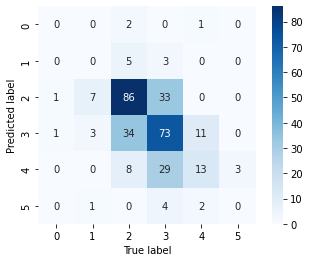

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menggunakan Naive Baiyes
y_pred = gnb.predict(X_test)

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')

#### Bandingkan dengan data white wine menggunakan multiple output dan binary output

In [69]:
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [70]:
print(white_wine.groupby('quality').size())
white_wine.info()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Multiple Output

In [71]:
# Split data
Y = white_wine['quality']
X = white_wine.drop(columns='quality')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Fit LogisticRegression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Fit Decision Tree Model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Fit KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Fit Naive Baiyes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Logistic Regression")
print("Accuracy on training data set: {:.2f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test data set: {:.2f}\n".format(logreg.score(X_test, y_test)))

print("Decision Tree")
print("Accuracy of Decision Tree Classifier on training data set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Decision Tree Classifier on test data set: {:.2f}\n".format(clf.score(X_test, y_test)))

print("KNN")
print("Accuracy of K-NN Classifier on training data set: {:.2f}".format(knn.score(X_train, y_train)))
print("Accuracy of K-NN Classifier on test data set: {:.2f}\n".format(knn.score(X_test, y_test)))

print("Naive Baiyes")
print("Accuracy on training data set: {:.2f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test data set: {:.2f}\n".format(gnb.score(X_test, y_test)))

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

Logistic Regression
Accuracy on training data set: 0.48
Accuracy on test data set: 0.44

Decision Tree
Accuracy of Decision Tree Classifier on training data set: 1.00
Accuracy of Decision Tree Classifier on test data set: 0.57

KNN
Accuracy of K-NN Classifier on training data set: 0.66
Accuracy of K-NN Classifier on test data set: 0.46

Naive Baiyes
Accuracy on training data set: 0.46
Accuracy on test data set: 0.44



c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Binary Output

In [72]:
# define values to remove
values_to_remove = [3, 4, 7, 8, 9]

# remove rows with values_to_remove in column A
white_wine = white_wine[~white_wine['quality'].isin(values_to_remove)]

In [73]:
print(white_wine['quality'].unique())

[6 5]


In [74]:
# Split data
Y = white_wine['quality']
X = white_wine.drop(columns='quality')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Fit LogisticRegression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Fit Decision Tree Model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Fit KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Fit Naive Baiyes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Logistic Regression")
print("Accuracy on training data set: {:.2f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test data set: {:.2f}\n".format(logreg.score(X_test, y_test)))

print("Decision Tree")
print("Accuracy of Decision Tree Classifier on training data set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Decision Tree Classifier on test data set: {:.2f}\n".format(clf.score(X_test, y_test)))

print("KNN")
print("Accuracy of K-NN Classifier on training data set: {:.2f}".format(knn.score(X_train, y_train)))
print("Accuracy of K-NN Classifier on test data set: {:.2f}\n".format(knn.score(X_test, y_test)))

print("Naive Baiyes")
print("Accuracy on training data set: {:.2f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test data set: {:.2f}\n".format(gnb.score(X_test, y_test)))

Logistic Regression


c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

Accuracy on training data set: 0.68
Accuracy on test data set: 0.72

Decision Tree
Accuracy of Decision Tree Classifier on training data set: 1.00
Accuracy of Decision Tree Classifier on test data set: 0.74

KNN
Accuracy of K-NN Classifier on training data set: 0.76
Accuracy of K-NN Classifier on test data set: 0.66

Naive Baiyes
Accuracy on training data set: 0.67
Accuracy on test data set: 0.67



## Unsupervised Learning

In [75]:
winecluster = dataset.copy()
winecluster = winecluster.drop(columns='quality')
winecluster.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


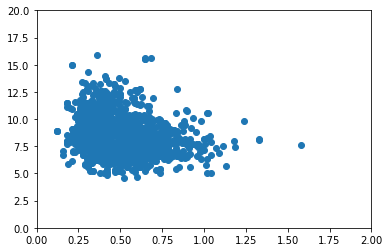

In [76]:
plt.scatter(winecluster['volatile acidity'], winecluster['fixed acidity'])
plt.xlim(0,2)
plt.ylim(0, 20)
plt.show()

In [77]:
x = dataset.iloc[:,0:2]
x.info()

from sklearn.cluster import KMeans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     1599 non-null   float64
 1   volatile acidity  1599 non-null   float64
dtypes: float64(2)
memory usage: 25.1 KB


c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans 

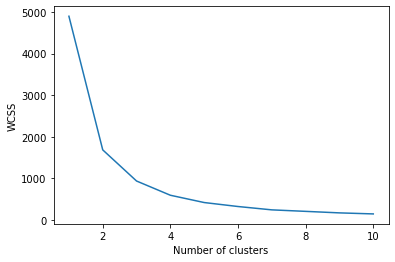

In [78]:
# Mencari jumlah K dengan Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [79]:
kmeans = KMeans(4)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


array([0, 0, 0, ..., 2, 2, 2])

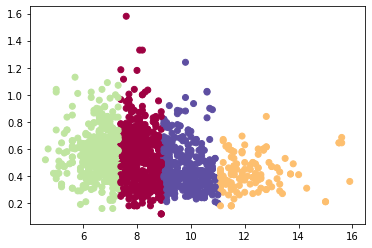

In [80]:
wine_cluster = winecluster.copy()
wine_cluster['Clusters'] = identified_clusters
plt.scatter(winecluster['fixed acidity'], winecluster['volatile acidity'], c=wine_cluster['Clusters'], cmap='Spectral')

# Challenge

#### Lakukan Clustering berdasarkan pada kolom free sulfur dioxide dan total sulfur dioxide. Apakah nilai K-nya sama dengan clustering sebelumnya?

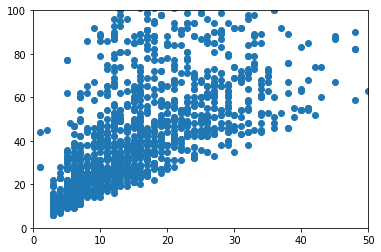

In [81]:
plt.scatter(winecluster['free sulfur dioxide'], winecluster['total sulfur dioxide'])
plt.xlim(0, 50)
plt.ylim(0, 100)
plt.show()

In [82]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
x = dataset.iloc[:,5:7]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   free sulfur dioxide   1599 non-null   float64
 1   total sulfur dioxide  1599 non-null   float64
dtypes: float64(2)
memory usage: 25.1 KB


In [84]:
x.head()

,free sulfur dioxide,total sulfur dioxide
0,11.0,34.0
1,25.0,67.0
2,15.0,54.0
3,17.0,60.0
4,11.0,34.0


c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans 

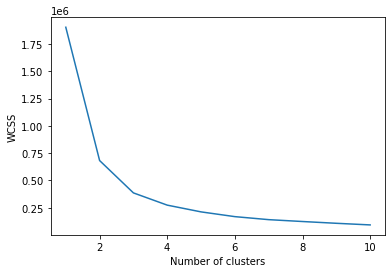

In [85]:
# Mencari jumlah K dengan Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [86]:
kmeans = KMeans(4)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


array([2, 3, 1, ..., 1, 1, 1])

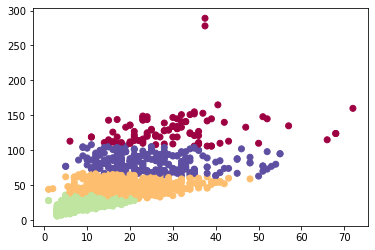

In [87]:
wine_cluster = winecluster.copy()
wine_cluster['Clusters'] = identified_clusters
plt.scatter(winecluster['free sulfur dioxide'], winecluster['total sulfur dioxide'], c=wine_cluster['Clusters'], cmap='Spectral')

# Clustering pada dataset Whitewine

In [88]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [122]:
winecluster = white_wine.copy()
winecluster = winecluster.drop(columns='quality')
winecluster.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


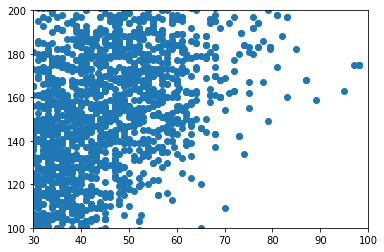

In [123]:
plt.scatter(winecluster['free sulfur dioxide'], winecluster['total sulfur dioxide'])
plt.xlim(30, 100)
plt.ylim(100, 200)
plt.show()

In [124]:
x = white_wine.iloc[:,5:7]
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3655 entries, 0 to 4897
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   free sulfur dioxide   3655 non-null   float64
 1   total sulfur dioxide  3655 non-null   float64
dtypes: float64(2)
memory usage: 85.7 KB


c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMea

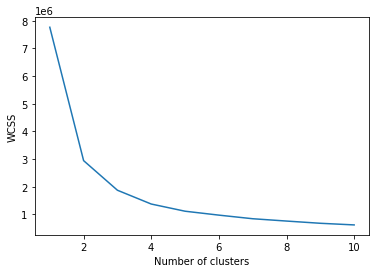

In [125]:
# Mencari jumlah K dengan Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [126]:
kmeans = KMeans(6)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


array([1, 0, 4, ..., 1, 4, 4])

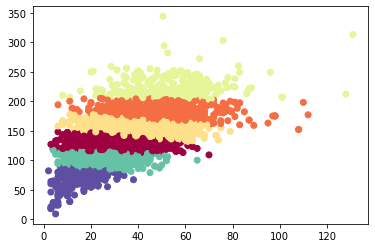

In [127]:
wine_cluster = winecluster.copy()
wine_cluster['Clusters'] = identified_clusters
plt.scatter(winecluster['free sulfur dioxide'], winecluster['total sulfur dioxide'], c=wine_cluster['Clusters'], cmap='Spectral')

In [1]:
!jupyter nbconvert --to html "./IS411_CLHY_00000053580_RendyWirawanTamrin_Week-07.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IS411_CLHY_00000053580_RendyWirawanTamrin_Week-07.ipynb to html
[NbConvertApp] Writing 932838 bytes to IS411_CLHY_00000053580_RendyWirawanTamrin_Week-07.html
